In [24]:
import pandas as pd
import os
import numpy as np
from prince import FAMD
import matplotlib.pyplot as plt

## GET DATASETS IN NON-ONE-HOT ENCODED FORMAT

In [3]:
#LOAD DATA
dataDir = 'CleanDataFinal'

#LOAD TRAINING DATA
#features
path = os.path.join(dataDir, 'trainFeaturesFinal.csv')
train_x_pd = pd.read_csv (path, index_col = 'HHX')
train_x = train_x_pd.to_numpy()
print(train_x.shape)

#LOAD TESTING DATA
#features
path = os.path.join(dataDir, 'testFeaturesFinal.csv')
test_x_pd = pd.read_csv (path, index_col = 'HHX')
test_x = test_x_pd.to_numpy()
print(test_x.shape) 

(22222, 5290)
(5556, 5290)


In [4]:
#LOAD ORIGINAL DATA
path = 'adult19.csv'
interviewData = pd.read_csv (path, index_col = 'HHX')
interviewData

,URBRRL,RATCAT_A,INCGRP_A,INCTCFLG_A,FAMINCTC_A,IMPINCFLG_A,PPSU,PSTRAT,HISPALLP_A,RACEALLP_A,...,PHSTAT_A,PROXYREL_A,PROXY_A,AVAIL_A,HHSTAT_A,INTV_QRT,RECTYPE,WTFA_A,WTIA_A,POVRATTC_A
HHX,,,,,,,,,,,,,,,,,,,,,
H048109,4,9,3,0,60000,2,2,122,3,2,...,3,NaN,NaN,1,1,1,10,13177.008,7601.336,2.96
H027044,4,9,3,0,50000,0,2,122,2,1,...,1,NaN,NaN,1,1,1,10,6140.552,3344.434,2.97
H058855,4,12,3,0,65000,1,2,122,2,1,...,3,NaN,NaN,1,1,1,10,9191.061,6949.498,4.28
H031993,4,14,5,0,120000,0,2,122,1,8,...,2,NaN,NaN,1,1,1,10,7900.035,6446.327,7.13
H007122,1,4,1,0,30000,0,2,115,2,1,...,4,NaN,NaN,1,1,1,10,10875.772,8646.586,1.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H046022,4,14,5,0,116204,0,100,114,2,1,...,3,NaN,NaN,1,1,4,10,2679.016,1965.416,7.65
H046232,4,8,3,0,68000,0,100,114,2,1,...,3,NaN,NaN,1,1,4,10,6726.495,3920.208,2.02
H043765,4,13,3,0,60000,0,100,114,2,1,...,2,NaN,NaN,1,1,4,10,1246.306,864.743,4.98


In [5]:
#LOAD CSV WITH DATA CLEANING INSTRUCTIONS
path = 'VariableNanDetails.csv'
data_cleaning_inst = pd.read_csv (path)
data_cleaning_inst

,COLUMN_INDEX,COLUMN_NAME,DESCRIPTION,DATA_TYPE,CATEGORICAL_TYPE,NANs,REPLACE_WITH,DROP_NAN_CODE_1,DROP_NAN_CODE_2,DROP_NAN_CODE_3,...,Code_4_Meaning,Code_5,Code_5_Meaning,Code_6,Code_6_Meaning,Code_7,Code_7_Meaning,Code_8,Code_8_Meaning,NOTES
0,402.0,POVRATTC_A,SA family poverty ratio,numerical,NaN,drop_nans,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,403.0,HHX,Randomly assigned household number unique to a...,recordkeeping - ID,NaN,drop_nans,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,404.0,WTIA_A,Weight - annual pre-post stratification calibr...,recordkeeping,NaN,drop_col,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,405.0,WTFA_A,Weight - Final Annual,recordkeeping,NaN,drop_col,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,406.0,RECTYPE,Record type,recordkeeping,NaN,drop_col,NaN,NaN,NaN,NaN,...,Sample Child Income,50.0,Paradata,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,264.0,PHQ82_A,"How often feeling down, past 2 weeks",categorical,ordinal,drop_col,NaN,NaN,NaN,NaN,...,Nearly every day,7.0,Refused,8.0,Not Ascertained,9.0,Don't Know,NaN,NaN,PHQ questions
530,265.0,PHQ81_A,"How often little interest in things, past 2 weeks",categorical,ordinal,drop_col,NaN,NaN,NaN,NaN,...,Nearly every day,7.0,Refused,8.0,Not Ascertained,9.0,Don't Know,NaN,NaN,PHQ questions
531,266.0,MHTHND_A,Needed counseling/therapy but did not get it d...,categorical,nominal,drop_nans,NaN,NaN,NaN,NaN,...,Nearly every day,7.0,Refused,8.0,Not Ascertained,9.0,Don't Know,NaN,NaN,NaN
532,267.0,MHTHDLY_A,"Delayed counseling/therapy due to cost, past 12m",categorical,nominal,drop_nans,NaN,NaN,NaN,NaN,...,Nearly every day,7.0,Refused,8.0,Not Ascertained,9.0,Don't Know,NaN,NaN,NaN


In [6]:
# #GRAB TRAINING DATA USING HHX IN ITS ORIGINAL FORMAT
# testHHX = train_x_pd.index.tolist()
#GRAB TESTING DATA USING HHX IN ITS ORIGINAL FORMAT
testHHX = test_x_pd.index.tolist()
test_data_original = interviewData.loc[testHHX, :]
#put HHX in as column (rest of script expects it as a column, not index)
test_data_original=test_data_original.reset_index()
test_data_original = test_data_original.rename(columns = {'index':'HHX'})
test_data_original

,HHX,URBRRL,RATCAT_A,INCGRP_A,INCTCFLG_A,FAMINCTC_A,IMPINCFLG_A,PPSU,PSTRAT,HISPALLP_A,...,PHSTAT_A,PROXYREL_A,PROXY_A,AVAIL_A,HHSTAT_A,INTV_QRT,RECTYPE,WTFA_A,WTIA_A,POVRATTC_A
0,H038561,1,14,5,0,200000,0,63,101,2,...,2,NaN,NaN,1,1,4,10,11037.472,5225.924,10.00
1,H043980,4,14,5,1,220000,0,16,109,2,...,1,NaN,NaN,1,1,4,10,6073.945,5716.518,10.00
2,H052102,3,7,1,0,25000,0,5,126,2,...,1,NaN,NaN,1,1,2,10,4454.983,3414.149,1.91
3,H015803,3,14,5,1,220000,0,4,100,2,...,2,NaN,NaN,1,1,3,10,9778.142,11062.271,10.00
4,H000267,2,13,4,0,96000,0,3,117,3,...,3,1.0,1.0,3,1,2,10,9386.832,10813.146,4.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5551,H035143,1,12,3,0,55000,2,6,113,2,...,2,NaN,NaN,1,1,2,10,6309.642,6385.852,4.21
5552,H035351,1,14,5,0,200000,0,23,133,2,...,1,NaN,NaN,1,1,3,10,12880.432,12987.214,10.00
5553,H019908,3,14,5,0,155000,0,26,118,2,...,1,NaN,NaN,1,1,2,10,4631.288,5408.342,9.21
5554,H038324,1,7,2,0,49000,0,25,135,1,...,1,NaN,NaN,1,1,2,10,12084.433,10930.770,1.89


In [50]:
#DROP RECORDKEEPING COLUMNS

#make working copy of data
cleanData = test_data_original.copy()
#make list of columns to drop 
cols = data_cleaning_inst.COLUMN_NAME[(data_cleaning_inst.DATA_TYPE == 'recordkeeping') &
                                      (data_cleaning_inst.NANs == 'drop_col')].tolist()
# drop irrelevant columns
cleanData = cleanData.drop(columns = cols)

#list columns that were dropped
print(data_cleaning_inst[['COLUMN_NAME', 'DESCRIPTION']][data_cleaning_inst.COLUMN_NAME.isin(cols)].to_string())
#print clean shape
print(cleanData.shape)

      COLUMN_NAME                                                                       DESCRIPTION
2          WTIA_A                               Weight - annual pre-post stratification calibration
3          WTFA_A                                                             Weight - Final Annual
4         RECTYPE                                                                       Record type
6        HHSTAT_A                                              Indicates person is the Sample Adult
137   IMPINCFLG_A                                         Imputed SA family income imputation flag 
138          PPSU                                Pseudo-PSU for public-use file variance estimation
139        PSTRAT                     \r\nPseudo-stratum for public-use file variance estimation \r
165  HHRESPSA_FLG  Sample Adult is the household respondent or the proxy who lives in the household
194       OGFLG_A                                                Other government reassignment flag


In [51]:
#DROP PHQ COLUMNS

#make list of columns to drop 
cols = data_cleaning_inst.COLUMN_NAME[(data_cleaning_inst.COLUMN_NAME.str.contains('PHQ', case=False)) &
    (data_cleaning_inst.NANs == 'drop_col')].tolist()

# drop irrelevant columns
cleanData = cleanData.drop(columns = cols)

#list columns that were dropped
print(data_cleaning_inst[['COLUMN_NAME', 'DESCRIPTION']][data_cleaning_inst.COLUMN_NAME.isin(cols)].to_string())
#print clean shape
print(cleanData.shape)

    COLUMN_NAME                                              DESCRIPTION
523     PHQ88_A  How often moving or speaking slow or fast, past 2 weeks
524     PHQ87_A            How often trouble concentrating, past 2 weeks
525     PHQ86_A           How often feeling bad about self, past 2 weeks
526     PHQ85_A        How often undereating or overeating, past 2 weeks
527     PHQ84_A                    How often feeling tired, past 2 weeks
528     PHQ83_A            How often trouble with sleeping, past 2 weeks
529     PHQ82_A                     How often feeling down, past 2 weeks
530     PHQ81_A        How often little interest in things, past 2 weeks
(5556, 507)


In [52]:
#DROP ROWS WITH NANS

#make list of columns to look for nans in 
cols = data_cleaning_inst.COLUMN_NAME[data_cleaning_inst.NANs.isin(['drop_nans', 'drop_nan_and_nan_codes'])]
#count nans per col
nans_drop_nans = cleanData[cols].isnull().sum(axis = 0)
    
# #drop rows with nans in cols
cleanData = cleanData.dropna(subset=cols)

#show nans per col
print(nans_drop_nans.to_string())
#print clean shape
print(cleanData.shape)        

POVRATTC_A      0
HHX             0
INTV_QRT        0
AVAIL_A         0
HYPEV_A         0
CHLEV_A         0
CHDEV_A         0
ASEV_A          0
CANEV_A         0
PREDIB_A        0
DIBEV_A         0
COPDEV_A        0
ARTHEV_A        0
DEMENEV_A       0
ANXEV_A         0
DEPEV_A         0
WEARGLSS_A      0
HEARAID_A       0
SOCWRKLIM_A     0
URBRRL          0
RATCAT_A        0
INCGRP_A        0
FAMINCTC_A      0
HISPALLP_A      0
RACEALLP_A      0
DISAB3_A        0
CITZNSTP_A      0
LEGMSTAT_A      0
MARSTAT_A       0
SMKECIGST_A     0
SMKCIGST_A      0
OTHGOV_A        0
OTHPUB_A        0
IHS_A           0
MILITARY_A      0
CHIP_A          0
MEDICAID_A      0
MEDICARE_A      0
PRIVATE_A       0
EDUC_A          0
MAXEDUC_A       0
PARSTAT_A       0
SAPARENTSC_A    0
MLTFAMFLG_A     0
OVER65FLG_A     0
HISDETP_A       0
HISP_A          0
REGION          0
MHTHRPY_A       0
DEPMED_A        0
DEPFREQ_A       0
ANXMED_A        0
ANXFREQ_A       0
HOMEHC12M_A     0
THERA12M_A      0
EYEEX12M_A

In [53]:
#CATEGORICAL ORDINAL DATA WITH NO 'NOT APPLICABLE' RESPONDENTS
#remove 'missing data codes' rows
#eg - not ascertained, refused, don't know

#check all columns with 'drop_nan_codes' instructions have missing data codes 
#data columns that need missing data codes remove
miss_code_col_A = data_cleaning_inst.COLUMN_NAME[data_cleaning_inst.NANs.isin(
    ['drop_nan_codes', 'drop_nan_and_nan_codes'])]

#instruction columns with missing data codes
miss_code_cols = ['DROP_NAN_CODE_1', 'DROP_NAN_CODE_2', 'DROP_NAN_CODE_3', 'DROP_NAN_CODE_4']
#select cols with missing data codes
miss_code_col_B = data_cleaning_inst.dropna(subset=miss_code_cols, how='all').COLUMN_NAME

#check they they are the same
miss_code_col_A = miss_code_col_A.sort_values()
miss_code_col_B = miss_code_col_B.sort_values()

#they are the same
print('all relevant cols have missing codes:', miss_code_col_A.equals(miss_code_col_B))

#make a copy (for ease in troubleshooting)
cleanData_copy = cleanData.copy()

#delete any rows with missing data codes in these rows
miss_code_col = miss_code_col_A.to_list()
for c in miss_code_col:
    miss_data_codes = data_cleaning_inst[miss_code_cols][data_cleaning_inst.COLUMN_NAME == c].dropna(axis=1).to_numpy().flatten()
    cleanData_copy = cleanData_copy[cleanData_copy[c].isin(miss_data_codes) == False]   

#check no missing codes remain     
miss_codes_remaining = []
for c in miss_code_col:
    unique_vals = np.sort(cleanData_copy[c].unique())
    miss_data_codes = np.sort(data_cleaning_inst[miss_code_cols][data_cleaning_inst.COLUMN_NAME == c].dropna(axis=1).to_numpy().flatten())
    intersection = np.intersect1d(unique_vals, miss_data_codes)
    miss_codes_remaining.append(intersection)   

print('missing codes remaining: ', np.sum(np.asarray(miss_codes_remaining)))

#save cleanData_copy as copy
cleanData = cleanData_copy.copy()
#look at shape 
print(cleanData.shape)

all relevant cols have missing codes: True
missing codes remaining:  0.0
(5556, 507)


In [54]:
#CATEGORICAL DATA: ADD NOT APPLICABLE CODES

#check all columns with 'replace' instructions have replace_with values
#data columns that need NaNs replaced
replaceNaNs_cols_A = data_cleaning_inst.COLUMN_NAME[data_cleaning_inst.NANs=='replace']

#select cols with replace-with values
replaceNaNs_cols_B = data_cleaning_inst.COLUMN_NAME[data_cleaning_inst.REPLACE_WITH.notna()]

#check they they are the same
replaceNaNs_cols_A = replaceNaNs_cols_A.sort_values()
replaceNaNs_cols_B = replaceNaNs_cols_B.sort_values()

#they are the same
print('all relevant cols have missing codes:', replaceNaNs_cols_A.equals(replaceNaNs_cols_B))

#make a copy (for ease in troubleshooting)
cleanData_copy = cleanData.copy()

#replace NaNs with appropriate code
replaceNaNs_cols = replaceNaNs_cols_A.to_list()
for c in replaceNaNs_cols:
    replace_code = data_cleaning_inst.REPLACE_WITH[data_cleaning_inst.COLUMN_NAME == c].to_numpy()[0]
    cleanData_copy[c] = cleanData_copy[c].fillna(replace_code)
    
#CHECK THERE ARE NO NANs LEFT
print('Number NaNs left: ', cleanData_copy.isnull().sum().sum())

#save cleanData_copy as copy
train_x_original = cleanData_copy.copy()
#set HHX back as index
train_x_original=train_x_original.set_index('HHX')
#look at shape 
print(train_x_original.shape)

all relevant cols have missing codes: True
Number NaNs left:  0
(5556, 506)


In [55]:
#STORE DATA

#make directory 
dataDir = 'OriginalData'
if not os.path.exists(dataDir):
    os.mkdir(dataDir)

#store original data
# filepath = os.path.join(dataDir, 'TrainingFeatures.csv')
filepath = os.path.join(dataDir, 'TestingFeatures.csv')
train_x_original.to_csv(filepath) 

In [14]:
#LOAD NONHOT ENCODED DATA
dataDir = 'OriginalData'

#LOAD TRAINING DATA
#features
path = os.path.join(dataDir, 'TrainingFeatures.csv')
train_x_pd_nonhot = pd.read_csv (path, index_col = 'HHX')
train_x_nonhot = train_x_pd_nonhot.to_numpy()
print(train_x_pd_nonhot.shape)

#LOAD TESTING DATA
#features
path = os.path.join(dataDir, 'TestingFeatures.csv')
test_x_pd_nonhot = pd.read_csv (path, index_col = 'HHX')
test_x_nonhot = test_x_pd_nonhot.to_numpy()
print(test_x_pd_nonhot.shape) 

(22222, 506)
(5556, 506)


## Change datatypes of categorical columns

In [15]:
# library recognizes categorical and numerical data based on column datatype
# changing categorical data to strings so it can tell the difference

#make copy of data
data_copy = train_x_pd_nonhot.copy()

#find names of all categorical columns
num_cols = data_cleaning_inst.COLUMN_NAME[(data_cleaning_inst.DATA_TYPE == 'numerical') 
                                         & (data_cleaning_inst.NANs != 'drop_col')]

data_cat = data_copy.drop(columns = num_cols)
cat_col = data_cat.columns.tolist()

#make dictionary of column names and datatype to turn them into (object)
datatype = ['object']*len(cat_col)
datatype_changes = pd.Series(datatype, index=cat_col)
datatype_changes = datatype_changes.to_dict()

#turn cat cols to object datatype: training data
train_x = train_x_pd_nonhot.copy()
train_x = train_x.astype(datatype_changes)

#turn cat cols to object datatype: testing data
test_x = test_x_pd_nonhot.copy()
test_x = test_x.astype(datatype_changes)
print(train_x.shape)
print(test_x.shape)

(22222, 506)
(5556, 506)


In [16]:
#JOIN TEST AND TRAINING FEATURES TO CONDUCT FAMD ON BOTH
x_all = pd.concat([train_x, test_x], axis=0)
x_all.shape

(27778, 506)

## FAMD

In [18]:
#FIT FAMD
#create object
famd = FAMD(n_components=506, n_iter=3, copy=True, check_input=True, engine='auto', random_state=42)
#fit on training data
famd = famd.fit(x_all)

In [22]:
famd.explained_inertia_

array([0.03353452, 0.02456629, 0.01540252, 0.00632977, 0.0057371 ,
       0.00556529, 0.0051633 , 0.00496261, 0.00476546, 0.00431381,
       0.00376095, 0.00356487, 0.003437  , 0.00329032, 0.00311784,
       0.00275115, 0.00243153, 0.00227409, 0.00214521, 0.00192189,
       0.00185065, 0.00175223, 0.00159271, 0.00156308, 0.0015156 ,
       0.00143937, 0.00142158, 0.00135267, 0.00132683, 0.0012589 ,
       0.00123637, 0.00119126, 0.00116985, 0.00114409, 0.0010983 ,
       0.00108291, 0.00106859, 0.00105914, 0.00105569, 0.00104304,
       0.00102538, 0.00100461, 0.00094927, 0.00094155, 0.00093679,
       0.00092557, 0.000917  , 0.00089884, 0.00089755, 0.00088065,
       0.00087312, 0.00086155, 0.00085131, 0.00084358, 0.00083887,
       0.00083013, 0.00081891, 0.00080496, 0.00080372, 0.00079695,
       0.00078739, 0.00078676, 0.00077497, 0.00076783, 0.00075719,
       0.00075   , 0.00073671, 0.00073336, 0.00072681, 0.00072036,
       0.00071183, 0.00070841, 0.0007022 , 0.00069236, 0.00068

In [21]:
famd.total_inertia_

0.001224306719788022

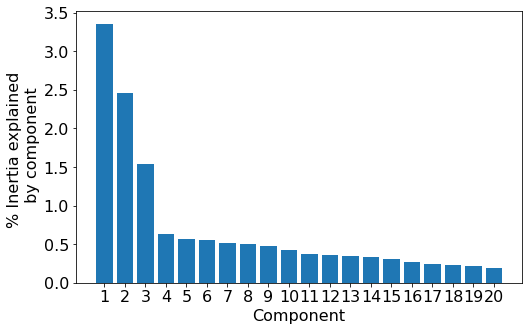

In [32]:
#PLOT FIRST 20 COMPONENTS
plt.figure(figsize=(8,5))
x = np.arange(1, 21)
plt.bar(x, famd.explained_inertia_[:20]*100)

plt.xticks (x, x.astype(str), fontsize=16)
plt.xlabel ('Component', fontsize=16)
plt.yticks (fontsize=16)
plt.ylabel ('% Inertia explained \n by component', fontsize=16)

path = 'FAMD_fulldata.png'
plt.savefig(path, bbox_inches='tight')

plt.show()